In [1]:
"""Author: Sameer Kesava

Linear Regression of Automobile Data.

Cross Validation using Validation Set Approach.

Plotting the test and fit data after Regression

Problem statement from Chapter 5
Book: An Introduction to Statistical Learning with Applications in R, 
       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Dataset: Auto (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)

Packages used: numpy, pandas, sklearn and matplotlib"""

'Author: Sameer Kesava\n\nLinear Regression of Automobile Data.\n\nCross Validation using Validation Set Approach.\n\nPlotting the test and fit data after Regression\n\nProblem statement from Chapter 5\nBook: An Introduction to Statistical Learning with Applications in R, \n       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani\n\nDataset: Auto (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)\n\nPackages used: numpy, pandas, sklearn and matplotlib'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
data_df = pd.read_csv("Auto")
data_df.head(10)

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,6,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,7,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,8,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,9,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,10,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


In [5]:
data_df.drop(columns = 'Unnamed: 0', inplace=True)
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
len(data_df)

392

In [8]:
#Checking Correlation
data_df.corr(method = 'pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [9]:
# Setting random_state = 1
x_train, x_test, y_train, y_test =  train_test_split(data_df[['horsepower']], data_df[['mpg']], test_size = 0.5, random_state = 1 )

#### Linear Model y = a0 + a1 * x

In [10]:
x_train.head()

,horsepower
31,95.0
55,70.0
256,105.0
32,100.0
268,95.0


In [11]:
y_train.head()

,mpg
31,25.0
55,26.0
256,20.6
32,19.0
268,21.1


In [12]:
lr = LinearRegression()

In [13]:
fit_data = lr.fit(x_train, y_train)

In [14]:
test_fit = fit_data.predict(x_test)
test_fit[:5]

array([[24.41268594],
       [27.8555737 ],
       [27.8555737 ],
       [22.06526247],
       [29.10753289]])

In [15]:
MSE = 0
for i in zip(y_test['mpg'], test_fit.ravel()):
    MSE = MSE + (i[0] - i[1])**2
MSE = MSE/len(y_test)

In [16]:
MSE

24.802120620593556

In [17]:
pd.DataFrame(data = list(zip(y_test['mpg'], test_fit.ravel()))).head()

,0,1
0,23.0,24.412686
1,29.0,27.855574
2,32.4,27.855574
3,19.0,22.065262
4,38.0,29.107533


#### 2nd degree polynomial y = a0 + a1 * x + a2 * x^2 

In [18]:
x_train2 =x_train.copy()
x_train2['horsepower^2'] = x_train2['horsepower']**2
x_train2.head()

,horsepower,horsepower^2
31,95.0,9025.0
55,70.0,4900.0
256,105.0,11025.0
32,100.0,10000.0
268,95.0,9025.0


In [19]:
x_test2 =x_test.copy()
x_test2['horsepower^2'] = x_test2['horsepower']**2
x_test2.head()

,horsepower,horsepower^2
81,97.0,9409.0
165,75.0,5625.0
351,75.0,5625.0
119,112.0,12544.0
379,67.0,4489.0


In [20]:
fit_data2 = lr.fit(x_train2, y_train)

In [21]:
test_fit2 = fit_data2.predict(x_test2).ravel()

In [22]:
MSE_2 = 0
for i in zip(y_test['mpg'], test_fit2):
    MSE_2 = MSE_2 + (i[0] - i[1])**2
MSE_2 = MSE_2/len(y_test)

In [23]:
MSE_2

18.848292603275656

#### 3rd degree polynomial y = a0 + a1 * x + a2 * x^2 + a3 * x^3

In [24]:
x_train3 =x_train2.copy()
x_train3['horsepower^3'] = x_train['horsepower']**3
x_train3.head()

,horsepower,horsepower^2,horsepower^3
31,95.0,9025.0,857375.0
55,70.0,4900.0,343000.0
256,105.0,11025.0,1157625.0
32,100.0,10000.0,1000000.0
268,95.0,9025.0,857375.0


In [25]:
x_test3 =x_test2.copy()
x_test3['horsepower^3'] = x_test['horsepower']**3
x_test3.head()

,horsepower,horsepower^2,horsepower^3
81,97.0,9409.0,912673.0
165,75.0,5625.0,421875.0
351,75.0,5625.0,421875.0
119,112.0,12544.0,1404928.0
379,67.0,4489.0,300763.0


In [26]:
fit_data3 = lr.fit(x_train3, y_train)

In [27]:
test_fit3 = fit_data3.predict(x_test3).ravel()

In [28]:
MSE_3 = 0
for i in zip(y_test['mpg'], test_fit3):
    MSE_3 = MSE_3 + (i[0] - i[1])**2
MSE_3 = MSE_3/len(y_test)

MSE_3

18.805111358604552

#### Choose a different train_test_split seed

#### linear model y = a0 + a1 * x 

In [29]:
# Setting random_state = 2
x_train, x_test, y_train, y_test =  train_test_split(data_df[['horsepower']], data_df[['mpg']], test_size = 0.5, random_state = 2 )

In [30]:
x_train.head()

,horsepower
120,150.0
356,116.0
256,105.0
144,75.0
242,48.0


In [31]:
y_train.head()

,mpg
120,15.0
356,25.4
256,20.6
144,28.0
242,43.1


In [32]:
lr = LinearRegression()

In [33]:
fit_data = lr.fit(x_train, y_train)

In [34]:
test_fit = fit_data.predict(x_test)
test_fit[:5]

array([[29.32124977],
       [24.87127949],
       [26.02497549],
       [32.12308292],
       [28.33236749]])

In [35]:
MSE = 0
for i in zip(y_test['mpg'], test_fit.ravel()):
    MSE = MSE + (i[0] - i[1])**2
MSE = MSE/len(y_test)
MSE

23.442643969985753

#### 2nd degree polynomial y = a0 + a1 * x + a2 * x^2

In [36]:
x_train2 =x_train.copy()
x_train2['horsepower^2'] = x_train2['horsepower']**2
x_train2.head()

,horsepower,horsepower^2
120,150.0,22500.0
356,116.0,13456.0
256,105.0,11025.0
144,75.0,5625.0
242,48.0,2304.0


In [37]:
x_test2 =x_test.copy()
x_test2['horsepower^2'] = x_test2['horsepower']**2
x_test2.head()

,horsepower,horsepower^2
55,70.0,4900.0
70,97.0,9409.0
313,90.0,8100.0
179,53.0,2809.0
307,76.0,5776.0


In [38]:
fit_data2 = lr.fit(x_train2, y_train)

In [39]:
test_fit2 = fit_data2.predict(x_test2).ravel()

In [40]:
MSE_2 = 0
for i in zip(y_test['mpg'], test_fit2):
    MSE_2 = MSE_2 + (i[0] - i[1])**2
MSE_2 = MSE_2/len(y_test)

MSE_2

18.550198801910334

#### 3rd degree polynomial y = a0 + a1 * x + a2 * x^2 + a3 * x^3

In [41]:
x_train3 =x_train2.copy()
x_train3['horsepower^3'] = x_train['horsepower']**3
x_train3.head()

,horsepower,horsepower^2,horsepower^3
120,150.0,22500.0,3375000.0
356,116.0,13456.0,1560896.0
256,105.0,11025.0,1157625.0
144,75.0,5625.0,421875.0
242,48.0,2304.0,110592.0


In [42]:
x_test3 =x_test2.copy()
x_test3['horsepower^3'] = x_test['horsepower']**3
x_test3.head()

,horsepower,horsepower^2,horsepower^3
55,70.0,4900.0,343000.0
70,97.0,9409.0,912673.0
313,90.0,8100.0,729000.0
179,53.0,2809.0,148877.0
307,76.0,5776.0,438976.0


In [43]:
fit_data3 = lr.fit(x_train3, y_train)

In [44]:
test_fit3 = fit_data3.predict(x_test3).ravel()

In [45]:
MSE_3 = 0
for i in zip(y_test['mpg'], test_fit3):
    MSE_3 = MSE_3 + (i[0] - i[1])**2
MSE_3 = MSE_3/len(y_test)

MSE_3

18.595222294554397

""" Binomial Model appears to be the best fit """

#### Plotting

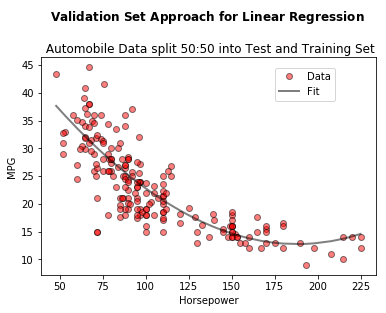

In [46]:
#Plotting test set 
fig, ax = plt.subplots(1,1)
alpha = 0.5 #transparency 

ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')

ax.plot(x_test, y_test, 'o', alpha=alpha, color = 'red', markeredgecolor = 'k', label = 'Data')
ax.plot(x_test.sort_values('horsepower'), fit_data3.predict(x_test3.sort_values('horsepower')).ravel(), alpha=alpha, lw = 2, \
        color = 'k', label = 'Fit')


lgd = ax.legend(loc = (0.7, 0.8))

ax.set_title('$\mathbf{Validation\ Set\ Approach\ for\ Linear\ Regression}$ \n\n Automobile Data split 50:50 into Test and Training Set')
#ax.text(x = 150, y= 30, s = 'Automobile Data split 50:50')
ax.axis('tight')

plt.show()

In [47]:
fig.savefig('VSA_LinReg.png', dpi = 200, format = 'png', bbox_extra_artists = (lgd,), bbox_inches = 'tight')